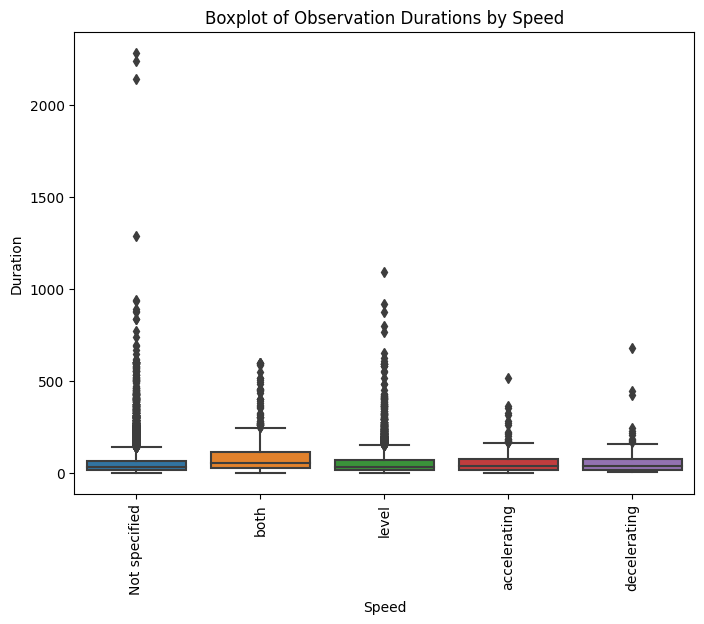

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"/kaggle/input/birdsong-recognition/train.csv")

# Boxplot of Observation Durations by Species
plt.figure(figsize=(8, 6))
sns.boxplot(x='speed', y='duration', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Observation Durations by Speed')
plt.xlabel('Speed')
plt.ylabel('Duration')
plt.savefig('Box Plot(Durations by Speed).png')
plt.show()

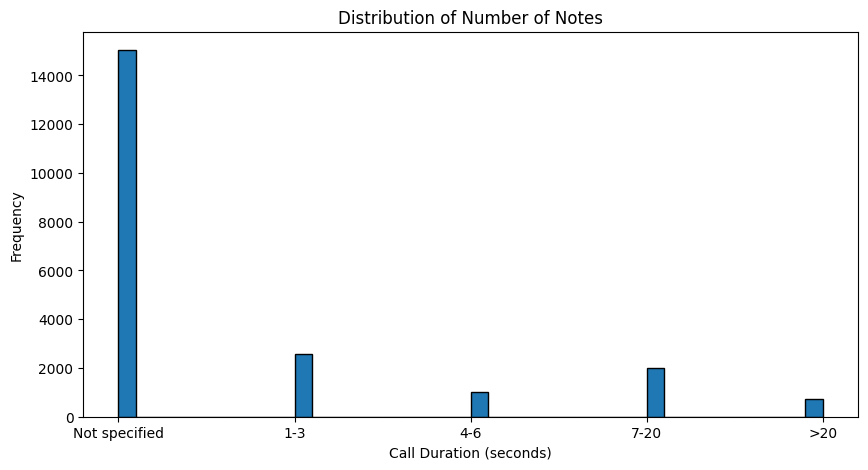

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"/kaggle/input/birdsong-recognition/train.csv")

plt.figure(figsize=(10, 5))
plt.hist(df['number_of_notes'], bins=40, edgecolor='black')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Notes')
plt.savefig('Bar Chart(Distribution of Notes).png')
plt.show()

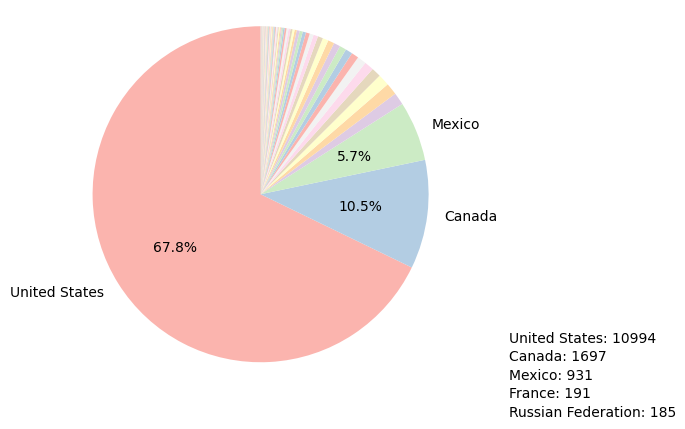

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv(r"/kaggle/input/birdsong-recognition/train.csv")

# Filter out the records where the bird was seen
seen_birds = data[data['bird_seen'] == 'yes']

# Group the data by country and count the occurrences
country_counts = seen_birds['country'].value_counts()

# Prob. Sort the counts and get the top three
top_three = country_counts.nlargest(3)

# Total Count. Sort the counts and get the top three
top_five = country_counts.head(5)
top_countries_names = top_five.index
top_countries_counts = top_five.values

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(country_counts, labels=country_counts.index, startangle=90, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)

# Hide all the labels
for text in ax.texts:
    text.set_visible(False)

# Only show the labels for the top three segments
for i, country in enumerate(top_three.index):
    ax.texts[i*2].set_visible(True)  # Label
    ax.texts[i*2 + 1].set_visible(True)  # Percentage

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Top 5 countries
for i, (name, count) in enumerate(zip(top_countries_names, top_countries_counts)):
    plt.annotate(f'{name}: {count}', xy=(1, 0.1 - i*0.05), xycoords='axes fraction')
    
# Display the pie chart
plt.show()


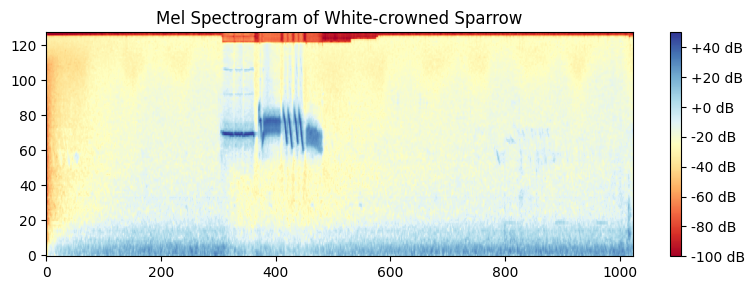

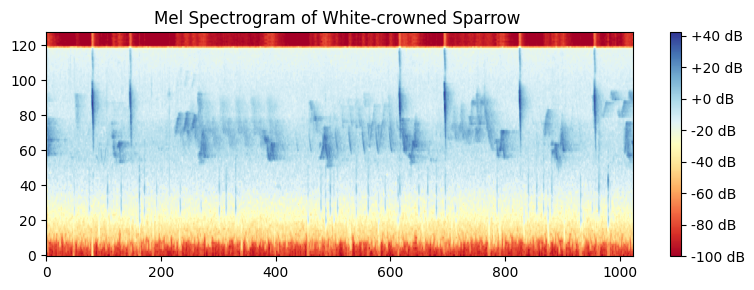

In [4]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from torchaudio.transforms import MelSpectrogram, Spectrogram

filename = '/kaggle/input/birdsong-recognition/train_audio/whcspa/XC125252.mp3'

waveform, sr = torchaudio.load(filename)
# mel spectrogram
mel_specgram = MelSpectrogram(sample_rate=sr, n_fft=2048, hop_length=512, n_mels=128)(waveform)

# adjust mel spectrogram size
target_length = 1024
n_frames = mel_specgram.shape[2]
if n_frames < target_length:
    pad = torch.zeros((1, mel_specgram.shape[1], target_length - n_frames))
    mel_specgram = torch.cat((mel_specgram, pad), dim=2)
elif n_frames > target_length:
    mel_specgram = mel_specgram[:, :, :target_length]

# convert the mel spectrogram to a dB scale and to a numpy array
mel_specgram = torchaudio.transforms.AmplitudeToDB()(mel_specgram).numpy()

# Visualize Mel Spectrogram features
plt.figure(figsize=(8, 3))
plt.imshow(mel_specgram[0], origin='lower', aspect='auto', cmap='jet')
plt.set_cmap('RdYlBu')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram of White-crowned Sparrow')
plt.tight_layout()
plt.savefig('Mel Spectrogram: White-crowned Sparrow(XC125252).png')
plt.show()

filename = '/kaggle/input/birdsong-recognition/train_audio/amered/XC101593.mp3'
waveform, sr = torchaudio.load(filename)
# mel spectrogram
mel_specgram = MelSpectrogram(sample_rate=sr, n_fft=2048, hop_length=512, n_mels=128)(waveform)

# adjust mel spectrogram size
target_length = 1024
n_frames = mel_specgram.shape[2]
if n_frames < target_length:
    pad = torch.zeros((1, mel_specgram.shape[1], target_length - n_frames))
    mel_specgram = torch.cat((mel_specgram, pad), dim=2)
elif n_frames > target_length:
    mel_specgram = mel_specgram[:, :, :target_length]

# convert the mel spectrogram to a dB scale and to a numpy array
mel_specgram = torchaudio.transforms.AmplitudeToDB()(mel_specgram).numpy()

# Visualize Mel Spectrogram features
plt.figure(figsize=(8, 3))
plt.imshow(mel_specgram[0], origin='lower', aspect='auto', cmap='jet')
plt.set_cmap('RdYlBu')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram of White-crowned Sparrow ')
plt.tight_layout()
plt.savefig('Mel Spectrogram: White-crowned Sparrow(XC101593).png')
plt.show()